<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/Lab%201/q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To import all required modules to apply K-means on google play store dataset 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tricker
import seaborn as sns
from sklearn.cluster import KMeans
import io
import pylab as pl
from google.colab import files
%matplotlib inline

##  Import dataset from File
To upload file and open it using pandas. Also, to  know dataset content and get some information about dataset features. In this question, we choose google play store dataset. The source of dataset is Kaggle.com.


In [84]:
# To upload file and open it using pandas 
playStoreFile = files.upload()

Saving googleplaystore.csv to googleplaystore (1).csv


In [0]:
gPSDataset = pd.read_csv(io.StringIO(playStoreFile['googleplaystore.csv'].decode('utf-8')))

In [86]:
# To show the first 5 rows in google play store dataset.
gPSDataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [87]:
# To show range of data, number of columns, type of features, and feature names  
gPSDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## To Handle Null Values
In this stage we handle null values in google play store dataset using two techniques. First we remove null values in rating feature by using fillna() function with the mean value. Seecond, we use dropna() function to remove rows that contain null values in the following features: Current Ver, Android Ver, Content Rating, and Type.


In [89]:
# To Show number of null values in each column in google play store dataset 
gPSDnullValues = pd.DataFrame(gPSDataset.isnull().sum().sort_values(ascending=False))
gPSDnullValues.columns = ['NO# of null values']
gPSDnullValues.index.name = 'Feature'
print(gPSDnullValues)

                NO# of null values
Feature                           
Rating                        1474
Current Ver                      8
Android Ver                      3
Content Rating                   1
Type                             1
Last Updated                     0
Genres                           0
Price                            0
Installs                         0
Size                             0
Reviews                          0
Category                         0
App                              0


In [0]:
#To fill null values using mean() function, we use this method only with Rating feature
gPSDataset.Rating.fillna(dataset.Rating.mean(),inplace=True)

In [91]:
# To Show number of null values in each column in google play store dataset, to check the difference after we apply fillna() on Rating
gPSDnullValues = pd.DataFrame(gPSDataset.isnull().sum().sort_values(ascending=False))
gPSDnullValues.columns = ['NO# of null values']
gPSDnullValues.index.name = 'Feature'
print(gPSDnullValues)

                NO# of null values
Feature                           
Current Ver                      8
Android Ver                      3
Content Rating                   1
Type                             1
Last Updated                     0
Genres                           0
Price                            0
Installs                         0
Size                             0
Reviews                          0
Rating                           0
Category                         0
App                              0


In [0]:
# To use dropna() function to remove the entire rwo if it contains null value.
gPSDataset = gPSDataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [93]:
# To Show number of null values in each column in google play store dataset, to check the difference after we apply fillna() and dropna() functions on dataset

gPSDnullValues = pd.DataFrame(gPSDataset.isnull().sum().sort_values(ascending=False))
gPSDnullValues.columns = ['NO# of null values']
gPSDnullValues.index.name = 'Feature'
print(gPSDnullValues)

                NO# of null values
Feature                           
Android Ver                      0
Current Ver                      0
Last Updated                     0
Genres                           0
Content Rating                   0
Price                            0
Type                             0
Installs                         0
Size                             0
Reviews                          0
Rating                           0
Category                         0
App                              0


## To Find Top 10 App Genres

In [94]:
# To Show Top 10 genres based on number of Application in this step we count number of applications in each genre
topGenres = gPSDataset.Genres.value_counts().sort_values(ascending=False)
topGenres.index.name = 'Genres'
print('Total of application by genres')
print(topGenres[:10])


Total of application by genres
Genres
Tools              840
Entertainment      622
Education          548
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    390
Communication      387
Lifestyle          381
Name: Genres, dtype: int64


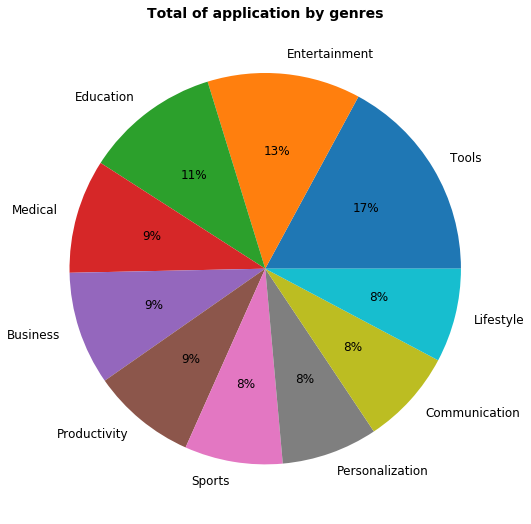

In [95]:
# To visulize the result, we used matplotlib pie figure to show the result.

# We used top 10 genres from previous step as labels 
labels = topGenres.index[0:10]

# We change figure size to 9,9
plt.figure(figsize=(9,9))

# To assign a title to the figure we used Total of application by genres as the figure title
plt.title('Total of application by genres', fontsize = 14, fontweight='bold')

#To display our result we used pie chart and we used topGenres[:10] as the data
plt.pie(topGenres[:10],labels = labels, autopct = '%1.0f%%', textprops={'fontsize': 12})
plt.savefig('Total of application by genres.png')
plt.show()

In [0]:
# As shown in dataset info() the type of reviews and rating features are object so we change them to integer type
gPSDataset['Reviews'] = gPSDataset['Reviews'].astype(int)
gPSDataset['Rating'] = gPSDataset['Rating'].astype(int)


In [98]:
# To check the type of rating and reviews after we change their types to integer
gPSDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
App               10829 non-null object
Category          10829 non-null object
Rating            10829 non-null int64
Reviews           10829 non-null int64
Size              10829 non-null object
Installs          10829 non-null object
Type              10829 non-null object
Price             10829 non-null object
Content Rating    10829 non-null object
Genres            10829 non-null object
Last Updated      10829 non-null object
Current Ver       10829 non-null object
Android Ver       10829 non-null object
dtypes: int64(2), object(11)
memory usage: 1.2+ MB


In [101]:
#To show most 10 popular app genres in google play store in term of genre, reviews, and user ratings:

topGenresRR = gPSDataset[['Genres','Reviews', 'Rating']].groupby(['Genres'], as_index=False).sum().sort_values(by=['Reviews'],ascending=False)
topGenresRR[0:10]


,Genres,Reviews,Rating
36,Communication,815462260,1486
101,Social,621241422,1149
27,Casual,412078863,723
0,Action,350303953,1419
6,Arcade,336990433,858
104,Strategy,327198471,410
108,Tools,272838697,3095
81,Photography,213516650,1282
102,Sports,192877617,1536
96,Shopping,115041222,1012


In [102]:
# To show statistic report about reviews feature
Reviews = gPSDataset[['Reviews']].describe()
Reviews

,Reviews
count,1.082900e+04
mean,4.446018e+05
std,2.929213e+06
min,0.000000e+00
25%,3.800000e+01
50%,2.100000e+03
75%,5.481500e+04
max,7.815831e+07


In [103]:
# To show statistic report about Rating feature
Rating = gPSDataset[['Rating']].describe()
Rating

,Rating
count,10829.000000
mean,3.809216
std,0.527927
min,1.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


## To create and train the Model

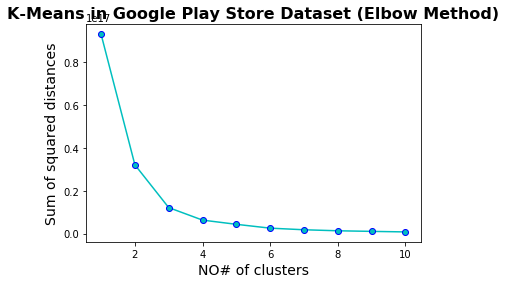

In [104]:
# To check which K is the best using the elbow method based on the result we will train our model using the best number of clusters we get

#To get the two features that we are going to use to categorize applications in google play store: 
gPSDataset_X = gPSDataset[['Reviews' , 'Rating']].iloc[: , :].values

# To Keep tracking of the line shape when we used elbow method

distortionsList = []

# To use different number of clusters when we train our model 
for i in range(1, 11):
    
    # To define a new model object we call it kmModel
    kmModel = KMeans(n_clusters=i, random_state=0)

    #To train the model using fet function using gPSDataset_X data set 
    kmModel.fit(gPSDataset_X)

    # To assign the Sum of squared distances of samples to their closest cluster center in each iteration to the distortionsList.
    distortionsList.append(kmModel.inertia_)

# To visualize the result we get in Elbow method 
plt.title('K-Means in Google Play Store Dataset (Elbow Method)', fontsize = 16, fontweight='bold')
plt.plot(range(1, 11), distortionsList, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('NO# of clusters', fontsize = 14)
plt.ylabel('Sum of squared distances', fontsize = 14)
plt.savefig('Elbow Method K-means.png', bbox_inches = 'tight')
plt.show()

## Result of Elbow Method:
As a result, we find out that K = 3 is the best number of clusters. We will train our model using 3 clusters to categorize application into 3 different groups.

In [107]:
# To define a new object of KMeans with 3 clusters
kmModel2 = KMeans(n_clusters=3,init='k-means++')

# To train our model using the new number of clusters which is 3
kmModel2.fit(gPSDataset_X)

#To Evaluate our model we used predict() function the we show the silhouette score
y_predict_kmeans2 = kmModel2.predict(gPSDataset_X)

from sklearn import metrics
kmModel2_score = metrics.silhouette_score(gPSDataset_X, y_predict_kmeans2)
print('The silhouette score of our model is: ', kmModel2_score)

The silhouette score of our model is:  0.9553669562635997


## Clusters Visualization
As a result applications in google play store will by divided into 3 groups

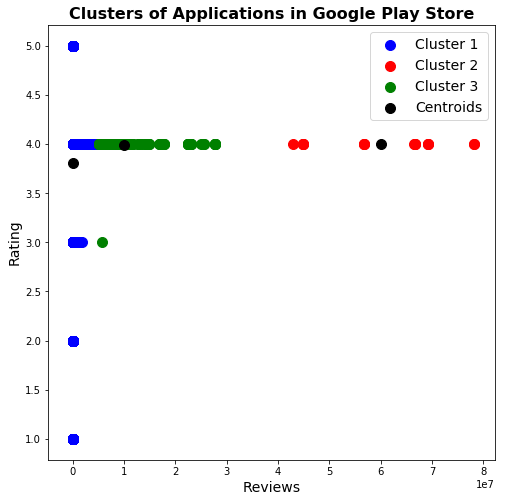

In [108]:

# To visualize our result we used scatter figure

plt.figure(figsize=(8,8))

plt.scatter(X[y_predict_kmeans2 == 0, 0], X[y_predict_kmeans2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_predict_kmeans2 == 1, 0], X[y_predict_kmeans2 == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_predict_kmeans2 == 2, 0], X[y_predict_kmeans2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#o show the centroid of each application group in the figure
plt.scatter(kmModel2.cluster_centers_[:, 0], kmModel2.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

# To create labels and title for our figure
plt.title('Clusters of Applications in Google Play Store', fontsize = 16, fontweight='bold')
plt.xlabel('Reviews', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('Google Play Store Application clusters.png', bbox_inches = 'tight')
plt.show()